In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import itertools
import time

In [4]:
data_dir = '/content/drive/My Drive/MIE498 Thesis/Share-Bike-Station-Clustering-and-Usage-Prediction/prediction_results'
checkin_errors_k2_8 = pd.read_csv("{}/CheckinErrors_K2=8.csv".format(data_dir), header=0, index_col=0)
checkin_errors_k2_12 = pd.read_csv("{}/CheckinErrors_K2=12.csv".format(data_dir), header=0, index_col=0)
checkin_errors_k2_16 = pd.read_csv("{}/CheckinErrors_K2=16.csv".format(data_dir), header=0, index_col=0)
checkout_errors_k2_8 = pd.read_csv("{}/CheckoutErrors_K2=8.csv".format(data_dir), header=0, index_col=0)
checkout_errors_k2_12 = pd.read_csv("{}/CheckoutErrors_K2=12.csv".format(data_dir), header=0, index_col=0)
checkout_errors_k2_16 = pd.read_csv("{}/CheckoutErrors_K2=16.csv".format(data_dir), header=0, index_col=0)
obj_func_vals_all = pd.read_csv('/content/drive/My Drive/MIE498 Thesis/Share-Bike-Station-Clustering-and-Usage-Prediction/objective_function_values.csv', header=0, index_col=0)
obj_func_vals_all['n Clustering Iterations'] = obj_func_vals_all['n Clustering Iterations'].astype("int")
obj_func_vals_all['k2'] = obj_func_vals_all['k2'].astype("int")
obj_func_vals_all['n Transition Matrix'] = obj_func_vals_all['n Transition Matrix'].astype("int")

In [5]:
checkout_errors_fsa = pd.read_csv("{}/CheckoutErrors_FSA.csv".format(data_dir), header=0, index_col=0)
checkin_errors_fsa = pd.read_csv("{}/CheckinErrors_FSA.csv".format(data_dir), header=0, index_col=0)

# FSA Clusters vs. Algorithm 1 Clusters

In [6]:
k2_list = [8, 12, 16]
checkin_errors_df_list = [checkin_errors_k2_8, checkin_errors_k2_12, checkin_errors_k2_16]
checkin_errors_all = pd.DataFrame(columns=['n Clustering Iterations', 'k2', 'n Transition Matrix', 'Temperature', 'mse', 'rmse', 'mre', 'mae'])
for k, k2_val in enumerate(k2_list):
  for idx, row in checkin_errors_df_list[k].iterrows():
    df_temp = {'n Clustering Iterations' : row[0], 'k2' : k2_list[k], 'n Transition Matrix' : row[1], 'Temperature': row[2], 'mse': row[3], 'rmse': row[4], 'mre': row[5], 'mae': row[6]}
    checkin_errors_all = checkin_errors_all.append(df_temp, ignore_index=True)

checkout_errors_df_list = [checkout_errors_k2_8, checkout_errors_k2_12, checkout_errors_k2_16]
checkout_errors_all = pd.DataFrame(columns=['n Clustering Iterations', 'k2', 'n Transition Matrix', 'Temperature', 'mse', 'rmse', 'mre', 'mae'])
for k, k2_val in enumerate(k2_list):
  for idx, row in checkout_errors_df_list[k].iterrows():
    df_temp = {'n Clustering Iterations' : row[0], 'k2' : k2_list[k], 'n Transition Matrix' : row[1], 'Temperature': row[2], 'mse': row[3], 'rmse': row[4], 'mre': row[5], 'mae': row[6]}
    checkout_errors_all = checkout_errors_all.append(df_temp, ignore_index=True)

In [7]:
def generate_plot_fsa_vs_algo1(error_measure, nTM, xlabelname, ylabelname, titlename):
  x_checkout_temp = checkout_errors_all[(checkout_errors_all['Temperature'] == True) & (checkout_errors_all['n Transition Matrix'] == nTM)][error_measure].to_numpy()
  x_checkout_notemp = checkout_errors_all[(checkout_errors_all['Temperature'] == False) & (checkout_errors_all['n Transition Matrix'] == nTM)][error_measure].to_numpy()
  x_checkout_temp_fsa = checkout_errors_fsa[(checkout_errors_fsa['Temperature'] == True) & (checkout_errors_fsa['n Transition Matrix'] == nTM)][error_measure].to_numpy()
  x_checkout_notemp_fsa = checkout_errors_fsa[(checkout_errors_fsa['Temperature'] == False) & (checkout_errors_fsa['n Transition Matrix'] == nTM)][error_measure].to_numpy()

  y_checkin_temp = checkin_errors_all[(checkin_errors_all['Temperature'] == True) & (checkin_errors_all['n Transition Matrix'] == nTM)][error_measure].to_numpy()
  y_checkin_notemp = checkin_errors_all[(checkin_errors_all['Temperature'] == False) & (checkin_errors_all['n Transition Matrix'] == nTM)][error_measure].to_numpy()
  y_checkin_temp_fsa = checkin_errors_fsa[(checkin_errors_fsa['Temperature'] == True) & (checkin_errors_fsa['n Transition Matrix'] == nTM)][error_measure].to_numpy()
  y_checkin_notemp_fsa = checkin_errors_fsa[(checkin_errors_fsa['Temperature'] == False) & (checkin_errors_fsa['n Transition Matrix'] == nTM)][error_measure].to_numpy()

  fig = figure(figsize=(8, 6), dpi=80)
  plt.scatter(x_checkout_temp, y_checkin_temp, marker='o', label='Algo 1 Clusters: With Temp', color='plum', s=60)
  plt.scatter(x_checkout_notemp, y_checkin_notemp, marker='+', label='Algo 1 Clusters: Without Temp', color='tomato', s=60)
  plt.scatter(x_checkout_temp_fsa, y_checkin_temp_fsa, marker='x', label='FSA Clusters:With Temp', color='green', s=60)
  plt.scatter(x_checkout_notemp_fsa, y_checkin_notemp_fsa, marker='*', label='FSA Clusters: Without Temp', color='blue', s=60)

  plt.xlabel(xlabelname, fontsize=14)
  plt.ylabel(ylabelname, fontsize=14)
  plt.title(titlename)
  # plt.xticks(x_checkout, x_checkout)
  plt.ylim(40, 100)
  plt.legend()
  plt.grid()
  plt.show()
  return fig

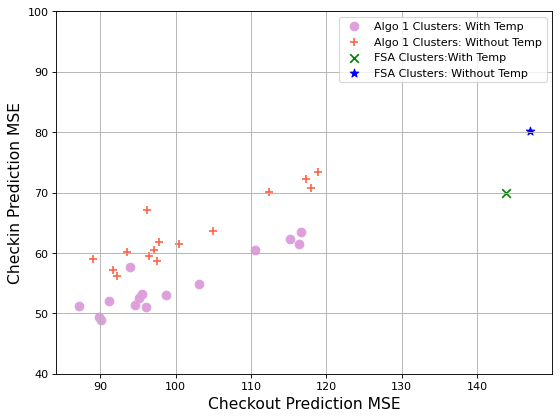

In [8]:
err_measure = 'mse' # 'rmse', 'mre', 'mae'
nTM = 48 # 24, 48
titlename = ''
xlabelname, ylabelname ='Checkout Prediction {}'.format(err_measure.upper()), 'Checkin Prediction {}'.format(err_measure.upper())
fig = generate_plot_fsa_vs_algo1(err_measure, nTM, xlabelname, ylabelname, titlename)
fig.savefig('FSA_vs_Algo1_Clusters_{}_{}TM.png'.format(err_measure.upper(), nTM))

## Algorithm 1: n Clustering Iterations (W) and K2

In [38]:
def generate_plot_algo1(x, y8, y12, y16, xlabelname, ylabelname, titlename):
  fig = figure(figsize=(8, 6), dpi=80)
  plt.scatter(x, y8, marker='o', label='K2 = 8', color='plum', s=60)
  plt.plot(x, y8, color='plum', alpha=0.5)
  plt.scatter(x, y12, marker='+', label='K2 = 12', color='tomato', s=60)
  plt.plot(x, y12, color='tomato', alpha=0.5)
  plt.scatter(x, y16, marker='x', label='K2 = 16', color='green', s=60)
  plt.plot(x, y16, color='green', alpha=0.5)

  plt.xlabel(xlabelname, fontsize=14)
  plt.ylabel(ylabelname, fontsize=14)
  plt.title(titlename)
  plt.xticks(x_checkout, x_checkout)
  # plt.ylim(40, 100)
  plt.legend()
  plt.grid()
  plt.show()
  return fig

### Checkout

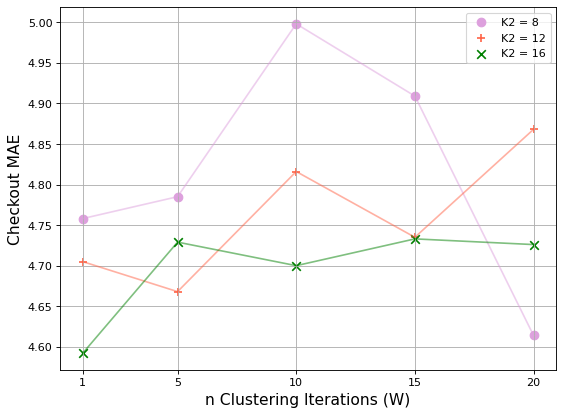

In [43]:
error_measure = 'mse' # 'rmse', 'mre', 'mae'
temp_flag = True
checkout_errors = checkout_errors_all[checkout_errors_all['Temperature'] == temp_flag]
x_checkout = [1, 5, 10, 15, 20] # n clusterinng iterations
y_checkout_8 = checkout_errors[(checkout_errors['n Transition Matrix'] == 1) & (checkout_errors['k2'] == 8)][error_measure].to_numpy()
y_checkout_12 = checkout_errors[(checkout_errors['n Transition Matrix'] == 1) & (checkout_errors['k2'] == 12)][error_measure].to_numpy()
y_checkout_16 = checkout_errors[(checkout_errors['n Transition Matrix'] == 1) & (checkout_errors['k2'] == 16)][error_measure].to_numpy()

x_name, y_name = 'n Clustering Iterations (W)', 'Checkout {}'.format(error_measure.upper())
titlename = '' # With temperature
fig = generate_plot_algo1(x_checkout, y_checkout_8, y_checkout_12, y_checkout_16, xlabelname=x_name, ylabelname=y_name, titlename=titlename)
fig.savefig('Checkout_vs_W_{}.png'.format(error_measure.upper()))

### Checkin

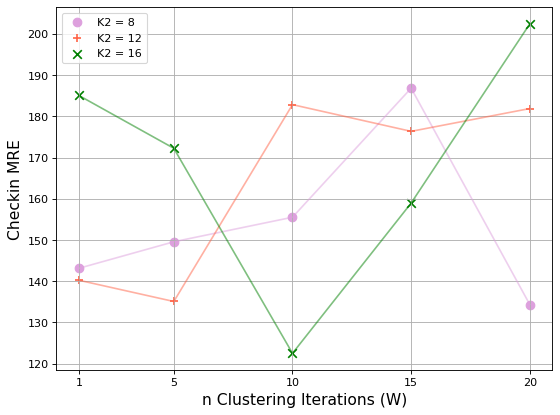

In [51]:
error_measure = 'mse' # 'rmse', 'mre', 'mae'
temp_flag = True
checkin_errors = checkin_errors_all[checkin_errors_all['Temperature'] == temp_flag]
x_checkin = [1, 5, 10, 15, 20] # n clusterinng iterations
nTM = 24 #24, 48
y_checkin_8 = checkin_errors[(checkin_errors['n Transition Matrix'] == nTM) & (checkin_errors['k2'] == 8)][error_measure].to_numpy()
y_checkin_12 = checkin_errors[(checkin_errors['n Transition Matrix'] == nTM) & (checkin_errors['k2'] == 12)][error_measure].to_numpy()
y_checkin_16 = checkin_errors[(checkin_errors['n Transition Matrix'] == nTM) & (checkin_errors['k2'] == 16)][error_measure].to_numpy()

x_name, y_name = 'n Clustering Iterations (W)', 'Checkin {}'.format(error_measure.upper())
titlename = '' # With temperature
fig0 = generate_plot_algo1(x_checkin, y_checkin_8, y_checkin_12, y_checkin_16, xlabelname=x_name, ylabelname=y_name, titlename=titlename)
fig0.savefig('Checkin_vs_W_{}_{}TM.png'.format(error_measure.upper(), nTM))

# Regardless of K2, W, and nTM

In [12]:
k2_list = [8, 12, 16]
checkin_errors_df_list = [checkin_errors_k2_8, checkin_errors_k2_12, checkin_errors_k2_16]
checkin_errors_all = pd.DataFrame(columns=['n Clustering Iterations', 'k2', 'n Transition Matrix', 'Temperature', 'mse', 'rmse', 'mre', 'mae'])
for k, k2_val in enumerate(k2_list):
  for idx, row in checkin_errors_df_list[k].iterrows():
    df_temp = {'n Clustering Iterations' : row[0], 'k2' : k2_list[k], 'n Transition Matrix' : row[1], 'Temperature': row[2], 'mse': row[3], 'rmse': row[4], 'mre': row[5], 'mae': row[6]}
    checkin_errors_all = checkin_errors_all.append(df_temp, ignore_index=True)

checkout_errors_df_list = [checkout_errors_k2_8, checkout_errors_k2_12, checkout_errors_k2_16]
checkout_errors_all = pd.DataFrame(columns=['n Clustering Iterations', 'k2', 'n Transition Matrix', 'Temperature', 'mse', 'rmse', 'mre', 'mae'])
for k, k2_val in enumerate(k2_list):
  for idx, row in checkout_errors_df_list[k].iterrows():
    df_temp = {'n Clustering Iterations' : row[0], 'k2' : k2_list[k], 'n Transition Matrix' : row[1], 'Temperature': row[2], 'mse': row[3], 'rmse': row[4], 'mre': row[5], 'mae': row[6]}
    checkout_errors_all = checkout_errors_all.append(df_temp, ignore_index=True)

## Temperature Feature

In [13]:
# def generate_temp_plot(xlabelname, ylabelname, titlename, error_measure, checkout_flag):
#   fig = figure(figsize=(15, 6), dpi=80)
#   if checkout_flag == True:
#     errors_temp = checkout_errors_all[checkout_errors_all['Temperature'] == True][['n Transition Matrix', error_measure]]
#     errors_notemp = checkout_errors_all[checkout_errors_all['Temperature'] == False][['n Transition Matrix', error_measure]]
#   else:
#     errors_temp = checkin_errors_all[checkin_errors_all['Temperature'] == True][['n Transition Matrix', error_measure]]
#     errors_notemp = checkin_errors_all[checkin_errors_all['Temperature'] == False][['n Transition Matrix', error_measure]]

#   plt.scatter(x1, y1, marker='o', label='With temperature', color='plum')
#   plt.scatter(x24, y24, marker='+', label='Without temperature', color='tomato')

#   plt.xlabel(xlabelname)
#   plt.ylabel(ylabelname)
#   plt.title(titlename)
#   plt.legend()
#   plt.grid()
#   plt.show()
#   return fig

## Plotting Checkout vs. Checkin (Transition Matrix Analysis)

In [14]:
def get_xCheckout_yCheckin(error_measure, temp_flag):
  checkout_errors = checkout_errors_all[checkout_errors_all['Temperature'] == temp_flag][['n Transition Matrix', error_measure]]  # regardless of n clustering iterations and value of k2
  # for checkout, the prediction error is the same regardless of number of transition matrices
  x_checkout_1TM = checkout_errors[checkout_errors['n Transition Matrix'] == 1][error_measure].to_numpy()
  x_checkout_24TM = checkout_errors[checkout_errors['n Transition Matrix'] == 24][error_measure].to_numpy()
  x_checkout_48TM = checkout_errors[checkout_errors['n Transition Matrix'] == 48][error_measure].to_numpy()

  checkin_errors = checkin_errors_all[checkin_errors_all['Temperature'] == temp_flag][['n Transition Matrix', error_measure]]  # regardless of n clustering iterations and value of k2
  y_checkin_1TM = checkin_errors[checkin_errors['n Transition Matrix'] == 1][error_measure].to_numpy()
  y_checkin_24TM = checkin_errors[checkin_errors['n Transition Matrix'] == 24][error_measure].to_numpy()
  y_checkin_48TM = checkin_errors[checkin_errors['n Transition Matrix'] == 48][error_measure].to_numpy()

  return x_checkout_1TM, x_checkout_24TM, x_checkout_48TM, y_checkin_1TM, y_checkin_24TM, y_checkin_48TM

In [52]:
def generate_plot(x1, x24, x48, y1, y24, y48, xlabelname, ylabelname, titlename):
  fig = figure(figsize=(10, 6), dpi=80)
  plt.scatter(x1, y1, marker='o', label='n Transition Matrix = 1', color='plum')
  plt.scatter(x24, y24, marker='+', label='n Transition Matrix = 24', color='tomato')
  plt.scatter(x48, y48, marker='x', label='n Transition Matrix = 48', color='green')

  plt.xlabel(xlabelname, fontsize=14)
  plt.ylabel(ylabelname, fontsize=14)
  plt.title(titlename)
  plt.xlim(80, 120)
  plt.ylim(40, 100)
  plt.legend()
  plt.grid()
  plt.show()
  return fig

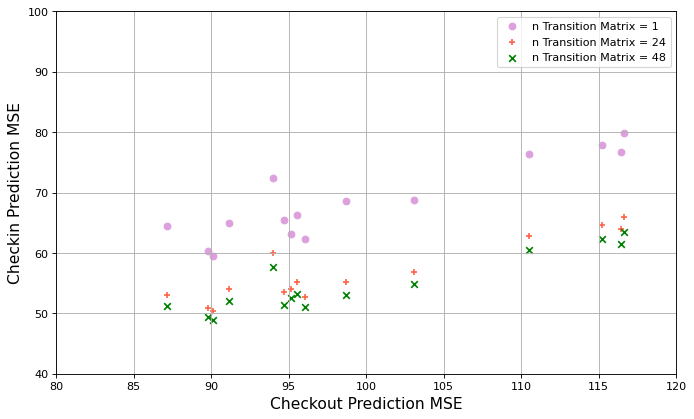

In [53]:
err_measure = 'mse' # 'rmse', 'mre', 'mae'
temp_flag = True # False
x_checkout_1TM, x_checkout_24TM, x_checkout_48TM, y_checkin_1TM, y_checkin_24TM, y_checkin_48TM = get_xCheckout_yCheckin(err_measure, temp_flag)
titlename = '' #'Comparing {} Values For Various Number of Transition Matrices (With Temperature Feature)'.format(err_measure.upper()
xlabelname, ylabelname ='Checkout Prediction {}'.format(err_measure.upper()), 'Checkin Prediction {}'.format(err_measure.upper())
fig1 = generate_plot(x1=x_checkout_1TM, x24=x_checkout_24TM, x48=x_checkout_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)
fig1.savefig('TM_Comparisons_{}.png'.format(err_measure.upper()))

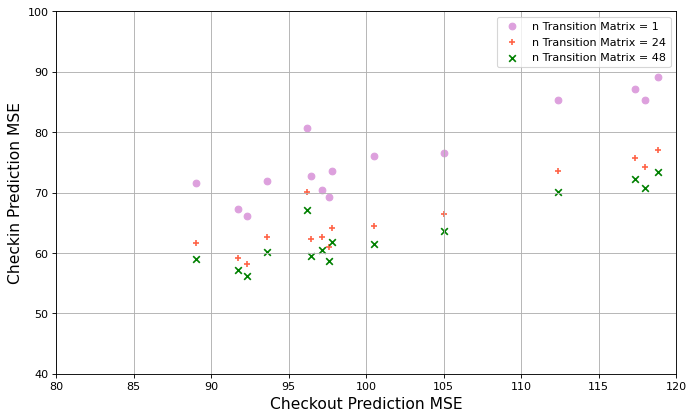

In [54]:
err_measure = 'mse' # 'rmse', 'mre', 'mae'
temp_flag = False # False
x_checkout_1TM, x_checkout_24TM, x_checkout_48TM, y_checkin_1TM, y_checkin_24TM, y_checkin_48TM = get_xCheckout_yCheckin(err_measure, temp_flag)
titlename = '' #'Comparing {} Values For Various Number of Transition Matrices (Without Temperature Feature)'.format(err_measure.upper()
xlabelname, ylabelname ='Checkout Prediction {}'.format(err_measure.upper()), 'Checkin Prediction {}'.format(err_measure.upper())
fig1 = generate_plot(x1=x_checkout_1TM, x24=x_checkout_24TM, x48=x_checkout_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)
fig1.savefig('TM_Comparisons_{}_NoTemp.png'.format(err_measure.upper()))

# Objective Function Value Metrics -- Prediction Errors Plots

In [ ]:
# regardless of n clustering iterations and value of k2
x_metric1_1TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 1]['Metric 1'].to_numpy()
x_metric1_24TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 24]['Metric 1'].to_numpy()
x_metric1_48TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 48]['Metric 1'].to_numpy()
x_metric2_checkout_1TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 1]['Metric 2 (Checkout)'].to_numpy()
x_metric2_checkout_24TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 24]['Metric 2 (Checkout)'].to_numpy()
x_metric2_checkout_48TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 48]['Metric 2 (Checkout)'].to_numpy()
x_metric2_checkin_1TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 1]['Metric 2 (Checkin)'].to_numpy()
x_metric2_checkin_24TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 24]['Metric 2 (Checkin)'].to_numpy()
x_metric2_checkin_48TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 48]['Metric 2 (Checkin)'].to_numpy()

## Metric 1

In [ ]:
xlabelname, ylabelname, titlename ='Metric 1', 'Checkout Prediction MSE', 'Comparing Metric 1 and Checkout Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric1_1TM, x24=x_metric1_24TM, x48=x_metric1_48TM, y1=x_checkout_1TM, y24=x_checkout_24TM, y48=x_checkout_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

In [ ]:
xlabelname, ylabelname, titlename ='Metric 1', 'Checkin Prediction MSE', 'Comparing Metric 1 and Checkin Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric1_1TM, x24=x_metric1_24TM, x48=x_metric1_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

## Metric 2

In [ ]:
xlabelname, ylabelname, titlename ='Metric 2 (Checkout)', 'Checkout Prediction MSE', 'Comparing Metric 2 and Checkout Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric2_checkout_1TM, x24=x_metric2_checkout_24TM, x48=x_metric2_checkout_48TM, y1=x_checkout_1TM, y24=x_checkout_24TM, y48=x_checkout_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

In [ ]:
xlabelname, ylabelname, titlename ='Metric 2 (Checkin)', 'Checkin Prediction MSE', 'Comparing Metric 1 and Checkin Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric2_checkin_1TM, x24=x_metric2_checkin_24TM, x48=x_metric2_checkin_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)